$Kode \space : \space C++\space \space \space , \space \space \space  Dato \space : \space 21.10.2019 \space \space \space , \space\space\space Emne \space : \space Fys3150\space \space \space , \space \space \space Navn \space : \space Roshan \space Azam \space , \space Erlend \space Akre $

## Numerical integration

### Abstrakt

I dette prosjektet tar vi for oss numerisk integrasjon ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

Sist men ike minst har vi laget et GitHub repository som inneholder kildekoden som vi har utviklet i dette projektet, i tillegg til et par håndplukkede resultater som skal brukte til å forsøke å vise at koden virker som den skal. GitHub repositoriet skal også vise en ganske detaljert logg av utviklingen av koden. GitHub repositoriet finner du her:

[https://github.com/Erlendak/FYS3150_Project_3](https://github.com/Erlendak/FYS3150_Project_3)

Hvis du ønsker å clone reposetory kan du bruke denne lenken: 

[https://github.com/Erlendak/FYS3150_Project_3.git](https://github.com/Erlendak/FYS3150_Project_3.git)


# 1. Introduksjon

$$\space $$
I dette projektet tar vi for oss et helium atom, der elektronene er i laveste energitilstand. Vi ønsker å avgjøre hvordan korrelasjonen av energien påvirker elektronene. Dette kan vi estimere ved hjelp av bølgeligningen til elektronene som vi utleder ved hjelp av Schrödingers likninger og interaksjonen mellom elektronene. Dette vil gi oss en 6-dimensjonal system som vi må integrere numerisk for å få resultater. I dette prosjektet er vi ikke opptatt av den fysiske delen eller hva som skjer med atomet, men vi er heller opptatt av hvordan vi modelerer og integrerer dette problemet numerisk og hvordan våre integrasjonsmetoder oppfører seg, hvor effektive de er og hvilke som gir best resultater. 

Vi bruker to metoder for å integerere funksjonen: Gauss Quadrature metoden, som er en lav-dimensjons metode der vi tar i bruk Legendre polynomer. Og Monte-Carlo som er en høy-dimensjons metode, der vi bruker uniform distribusjon. Så prosjektet vårt koker ned til å løse en 6-dimensjonal funksjon med forskjellige metoder og se hvilken som er best gir best resultater. Dette gjør vi først direkte uten noen forhåndsregninger og i kartesiske koordinater, dette blir kalt en brute force måte å løse problemet på.

Vi vil så effektivisere de to integrasjonsmetodene våre, dette har vi tenkt til å gjøre ved å bytte koordinatsystem slik at funksjonen vår er i polar-koordinater istedenfor i kartesiske koordinater. I tillegg til dette kan vi endre polynomene som vi bruker i Gauss Quad metoden til Laguerre polynomer, og endre distrubisjonen vi bruker i Monte-Carlo til eksponential distrubisjon. Med dette burde vi få fire sett med metoder, der to av dem er brute force og to er forbedrede versioner av metodene. Vi vil også parallellisere Monte-Carlo metodene for å se hvor mye mer effektiv metoden blir.


# 2. Formalisme

### 2.1 Setter opp integrand
Vi starter med å modelere bølgefunksjonen til elektronene $e_i$ i tilstanden s1, da kan vi tilnærme posisjonen til elektronene på dimensjonsløs form: 

$$ {\bf r}_i =  x_i {\bf e}_x + y_i {\bf e}_y +z_i {\bf e}_z  $$

Siden vi ser på energitilstanden 1s så gir det oss bølgefunksjonen ;

$$ \psi_{1s}({\bf r}_i)  =   e^{-\alpha r_i},$$

her $ \alpha $ er en parameter som tilsvarer atomkjernens ladning, vi tar for oss helium atomer og setter dermed $\alpha$ til 2. Distansen fra atomet til det aktuelle elektronet uttrykes ved $r_i = \sqrt{x_i^2+y_i^2+z_i^2} $.

Siden vi ser på et helum atom så vil vi ha to elektroner, hvor vi antar at begge er i energitilstanden 1s. Dette gjør at når vi skal se på bølgefunksjonen til massesenteret til elektronene gir det oss produktet av hver av elektronenes separate bølgefunksjoner uttryket ved ; 

$$\Psi({\bf r}_1,{\bf r}_2)  =   e^{-\alpha (r_1+r_2)}.$$

Hvis vi så implementerer frastøtende interaksjoner mellom elektronene, uttrykket er fortsatt ikke normalisert, men vi ser bort fra dette under dette projeketet.

$$ \langle \frac{1}{|{\bf r}_1-{\bf r}_2|} \rangle = \int_{-\infty}^{\infty} d{\bf r}_1d{\bf r}_2  e^{-2\alpha (r_1+r_2)}\frac{1}{|{\bf r}_1-{\bf r}_2|} $$

Da har vi et generelt utrykk som vi kan integrere numerisk ved hjelp av de forskjellige metodene våre. 

### 2.2 Generelt om Gaussian Quadrature
Gauss Quadrature baserte metoder brukes for det meste i tilfeller der integranden varierer sakte over et stort intervall. Andre  metoder vil konvergere sakte mot en viss presisjon i disse tilfellene. Men med Gauss Quadrature baserte metoder vil vi få bedre precision med få integrasjonspunkter, men det er viktig at integranden vår varierer glatt hvis vi ikke vil splitte intervallet inn til flere små sub-intervaller. Basisen bak alle integrasjonsmetoder er at vi approksimerer integral 
$$I =\int_{a}^{b}f(x)dx \approx \sum_{i=1}^{N} \omega_if(x_i) $$  
der $\omega$ er vekter og x er valgte mesh points. Mesh points er fiksert og blir valgt når du setter en N verdi, og vektene kommer fra integrasjonsmetoden du velger. I Gaussian Quadrature vil meshpoints som oftest ikke være like langt fra hverandre, og vektene vil bli vilkårlig valgt gjennom bruken av ortogonale polynomer i et visst intervall. I våre metoder vil vi bruke Legendre polynomer og Laguerre polynomer. Feilen i Gauss Quadratic formelen gis som 
$$\int_{a}^{b}W(x)f(x)dx-\sum_{k=1}^{N}w_kf(x_k) = \frac{f^{2N}(\xi)}{2N!}\int_{a}^{b}W(x)[q_N(x)]^2dx $$
der $W(x)$ er vektfunksjonen (ikke det samme som vektene!) til valgte polynomer, $q_N$ er valgte polynomer og $\xi$ er et tall i intervallet $[a,b]$ og vi antar at $f \in C^{2N}[a,b]$, som er i alle reelle eller komplekse 2N ganget kontinuerlige deriverbare funksjoner. Grunnen til at vi vil ha ortogonale polynomer er at metoder basert på Taylor series som bruker N punkter vil integrere eksakt for et polynom P av N-1 grad. Så hvis vi klarer å approksimere funksjonen vår med et polynom av N-1 grad med N mesh punkter så klarer viå integrere eksakt for $P_{N-1}$. Dette gjelder også for Gauss Quadrature, og er mer effektivt i denne metoden.

### 2.3 Gauss Quadrature med Legendre polynomer
Den første integrasjonsmetoden vi bruker er Gauss Quadrature med Legendre polynomer. Vi ser ut fra utrykket at når  $r_i = \sqrt{x_i^2+y_i^2+z_i^2} $, så kan vi skrive utrykket vårt opp som et 6-dimensjonalt integral over $d{\bf x}_1d{\bf y}_1d{\bf z}_1d{\bf x}_2d{\bf y}_2d{\bf z}_2$, dette gjør vi da ved å sette inn for $r_i$ i integranden vår:

$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-2\alpha (\sqrt{x_1^2+y_1^2+z_1^2}+\sqrt{x_2^2+y_2^2+z_2^2})}\frac{1}{|\sqrt{x_1^2+y_1^2+z_1^2}-\sqrt{x_2^2+y_2^2+z_2^2}|} d{\bf x}_1d{\bf y}_1d{\bf z}_1d{\bf x}_2d{\bf y}_2d{\bf z}_2. $$
Vi legger merke til at nevneren kan bli problematisk når forskjellen mellom $r_1$ og $r_2$ blir veldig liten, vi passer på å håndtere dette med en if-test som returnerer hopper over bidraget for leddet om nevneren blir for liten eller lik 0.

Legendre polynomer er definert i intervallet $x\in[-1,1]$, og er ortogonale. Selv om Legendre polynomene bare er definert mellom -1 og 1 kan vi forandre intervallet ved et variabelskifte og omskrive integralet slik at vi har et invervall mellom $[a,b]$, som betyr at vi kan integrere mellom intevallet vårt $[-\infty,\infty]$. Siden datamaskinen ikke klarer å regne ut noe som er uendelig må vi approksimere dette på en eller annen måte. 

Vi vet at energitilstanden er  $e^{-\alpha r_i}$, ser på denne finner vi ut at den er omtrent 0 i et vist intervall. Vi ser ut fra plottet at intervallet $[-3,3]$ er en bra approksimasjon på uendelig, så vi byttet da integrasjonsintervallet vårt fra $[-\infty,\infty]$ til $[-3,3]$.
Etter dette skal vi da stå igjen med:
$$\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1}\sum_{l=0}^{N-1}\sum_{m=0}^{N-1}\sum_{n=0}^{N-1} \omega_i\omega_j\omega_k\omega_l\omega_m\omega_nf(x_i,x_j,x_k,x_l,x_m,x_n)$$
der $f$ er integranten og $w$ er vektene. Som vi ser er dette 6-dimensjonalt. Vi har 6 loops,en for hver dimensjon som gir vekter og meshgrid i hvert av dimensjonene, og summasjonen av dette skal gi resultatet vårt.

### 2.4 Gauss Quadrature med Laguerre polynomer

Legendre metoden er en svært tung metode, så vi vil effektivisere den ved å bruke Laguerre polynomer istedenfor Legendre polynomer, og i tillegg vil vi bytte fra de kartesiske koordinatene vi brukte til sfæriske koordinater. For å skrive om til sfæriske koordinater starter vi med integranden vår:

$$ \langle \frac{1}{|{\bf r}_1-{\bf r}_2|} \rangle = \int_{-\infty}^{\infty} d{\bf r}_1d{\bf r}_2  e^{-2\alpha (r_1+r_2)}\frac{1}{|{\bf r}_1-{\bf r}_2|} $$
vi omformer så dette til utrykket:
$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle = \int_{-\infty}^{\infty}  e^{-2\alpha (r_1+r_2)}\frac{1}{r_{12} } $$
der 

$$ \frac{1}{r_{12}}= \frac{1}{\sqrt{r_1^2+r_2^2-2r_1r_2cos(\beta)}} $$

og

$$ cos(\beta) = cos(\theta_1)cos(\theta_2)+sin(\theta_1)sin(\theta_2)cos(\phi_1-\phi_2)) $$

Vi at vi skal integrer over de sfæriske koordinatene, så vi kan skrive om $d{\bf r}_1d{\bf r}_2$ til:

$$ d{\bf r}_1d{\bf r}_2  = r_1^2dr_1 r_2^2dr_2 dcos(\theta_1)dcos(\theta_2)d\phi_1d\phi_2, $$

Dette gir oss:

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  = \int_0^{\infty} r_1^2dr_1 \int_0^{\infty}r_2^2dr_2 \int_0^{\pi}dcos(\theta_1)\int_0^{\pi}dcos(\theta_2)\int_0^{2\pi}d\phi_1\int_0^{2\pi}d\phi_2  \frac{\exp^{-2\alpha(r_1+r_2)}}{r_{12}}$$

Så kan vi skrive om 
$$dCos(\theta_1) = Sin(\theta_1)d\theta_1$$ $$dCos(\theta_2)=Sin(\theta_1)d\theta_2$$

Dette gir oss:

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  = \int_0^{\infty} r_1^2dr_1 \int_0^{\infty}r_2^2dr_2 \int_0^{\pi}Sin(\theta_1)d\theta_1\int_0^{\pi}Sin(\theta_2)d\theta_2\int_0^{2\pi}d\phi_1\int_0^{2\pi}d\phi_2  \frac{\exp^{-2\alpha(r_1+r_2)}}{r_{12}}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  \int_0^{\infty} \int_0^{\infty} \int_0^{\pi} \int_0^{\pi} \int_0^{2\pi} \int_0^{2\pi} r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}}dr_1 dr_2 d(\theta_1)d(\theta_2)d\phi_1d\phi_2$$
Som er integralet vårt på polarform. Vi vet at Laguerre polynomer er definert mellom $x \in [0,\infty)$, i motsetning til Legendre som er definert mellom $x \in[-1,1]$. Dette gjør altså at vi kan integrere i intervallet $[0,\infty]$. Men dette gjelder bare for radiusen. Vi har også vinkler som vi må ta hensyn til når vi integrerer, og disse kan vi ikke bruke Laguerre polynomer på. Måten vi har valgt å integrere vinklene på er ved å bruke Legendre polynomer igjen på disse, og så bruker vi Laguerre på radiusen.

Når vi bruker Laguerre vil vi kunne absorbere en del av funksjonen inn i vektene. Dette gjør vi ved valg av $alf$ når vi kjører funksjonen. I vårt tilfelle setter vi $alf = 0$, og da kan vi skrive om integranden vår til:

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}} \hspace{2cm} \cdot| \bigg(e^{-(r_1+r_2)} \bigg)^{-1}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  = \frac{ r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}}}{e^{-(r_1 +r_2)}}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  Sin(\theta_1) Sin(\theta_2) \frac{e^{-2\alpha (r_1+r_2)}}{ e^{-(r_1 +r_2)}}  \frac{1}{r_{12}}$$

$$ r_1^2 r_2^2 Sin(\theta_1) Sin(\theta_2) e^{-2\alpha (r_1+r_2)} e^{(r_1 +r_2)} \frac{1}{r_{12}}$$

$$ r_1^2 r_2^2 Sin(\theta_1) Sin(\theta_2) e^{(-2\alpha (r_1+r_2))+(r_1 +r_2)}  \frac{1}{r_{12}}$$

$$ r_1^2 r_2^2 Sin(\theta_1) Sin(\theta_2) e^{(r_1+r_2)(-2\alpha + 1)}  \frac{1}{r_{12}}$$
 Og siden $alf$ er 0 så gir dette oss ;
 
$$\underline{ \underline{ r_1^2 r_2^2 Sin(\theta_1) Sin(\theta_2) e^{-3(r_1+r_2)}  \frac{1}{r_{12}}}} $$

Nå har vi integranten på formen vi vil ha den, vi integrerer vinklen $\phi$ over intervallet $[0,\pi]$ og $\theta$ over intervallet $[0,2\pi]$ med Legrende, og vi integrer r i intervallet $[0,\inf]$, som vi vet kan approksimeres til $[0,3]$. Da har vi alt vi trenger og kan sette opp det numeriske integralet:

$$\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1}\sum_{l=0}^{N-1}\sum_{m=0}^{N-1}\sum_{n=0}^{N-1} \omega_{r_1}\omega_{\phi_1}\omega_{\theta_1}\omega_{r_2}\omega_{\phi_2}\omega_{\theta_2}*f(x_{r_1},x_{\phi_1},x_{\theta_1},x_{r_2},x_{\phi_2},x_{\theta_2})$$

der $\omega$ er vektene og $f$ er integranden i sfæriske koordinater. Vektene og meshgrid for r blir regnet ut av Laguerre, vektene og meshgrid for vinklene blir regnet ut av Legrende. 



### 2.5 Generelt om Monte Carlo metoden
Som vi allerede har sagt er basisen bak numeriske integraler
$$I =\int_{a}^{b}f(x)dx \approx \sum_{i=1}^{N} \omega_if(x_i). $$ 
Dette gjelder også for Monte Carlo metoden. Ut fra dette setter vi vektene $\omega_i = 1$, dette gir oss da rektangel metoden:
$$I =\int_{a}^{b}f(x)dx \approx h \sum_{i=1}^{N} f(x_{i-1/2})$$ 
der $f(x_{i-1/2})$ er midtpunktverdien for f gitt en $x_{i-1/2}$.
Vi setter h = (b-a)/N der b=1 og a=0, da kan vi skrive om integralet til:
$$I =\int_{0}^{1}f(x)dx \approx \frac{1}{N} \sum_{i=1}^{N} f(x_{i-1/2})$$
Vi sier at gjennomsnittet av funksjonen f for en gitt PDF p(x) som:
$$<f> =  \sum_{i=1}^{N} f(x_i)p(x_i)$$
her er p(x) den uniforme distribusjonen i dette tilfellet, så vi kan skrive p(x)=1 når $x \in [0,1]$. Vi vil velge et vilårlig tall Så vi kan skrive at 
$$I =\int_{0}^{1}f(x)dx \approx <f>.$$ For en generell distribusjon skal det være mulig å skrive 
$$I =\int_{a}^{b}f(x)dx \approx <f>.$$

I tillegg til dette må vi ha variansen og avviket vi får. Siden vi bruker vilkårlige tall innenfor intervallet vårt så betyr dette at vi vil få et avvik og en varianse. Vi definerer varianse som $\sigma$^2 og standard avvik som $\sigma$. 
Vi kan skrive
$$\sigma_f = \sum_{i=1}^{N}(f(x_i)-<f>)^2p(x_i)$$
Men i spesialtilfeller der vi antar at sannsynligheten for korrelerte hendelser er null, kan vi skrive om til:
$$\sigma_N^2 = \frac{1}{N}(<f>^2-<f>^2)=\frac{\sigma_f^2}{N}$$
og standard avvik blir
$$\sigma_N \sim \frac{1}{\sqrt(N)}$$

### 2.6 Brute Force Monte Carlo
Monte Carlo metoden fungerer bedre for høye dimensjonsintegral enn Gauss metoden. I Brute Force Monte Carlo integrer vi i kartesiske koordinater som før, og vi gjør ingen forhåndsregninger. Vi bruker en uniform distribusjon og lar integranten stå på kartesisk form. Vi bruker en random generator for å få ut vilkårlige tall i intervallet vårt. Når vi holder på med Monte Carlo metoden i flere dimensjoner trenger vi en Jacobi determinant, for uniform distribusjon vil Jacobi determinanten vår se ut som:
$\Pi_{i=1}^d(b_i-a_i)$, der d=6 siden det er dimensjonen vår.  Vi trenger en Jacobi determinant fordi når vi driver med multidimensjonale integraler trenger vi en transformasjon av variabler, der formen avhenger av hvilken type distribusjon du bruker. 

$$I =\int_{a}^{b}f(x)dx \approx \sum_{i=1}^{N} f(x_i)p(x_i)$$




### Importance Sampling Monte Carlo 

### Parallellisering

Videre har vi parallellisert Monte Carlo metodene ved hjelp av OpenMP bibloteket til c++. OpenMP finner ut hvor mange prosseseringstråder som er tilgjengelig på marskinen den jobber på, deretter fordeler den forskjellige oppgaver som vi har spesifisert på forhånd på hver av trådene, slik at de kan jobbe parallellt med hverandre og dermed kutte ned på tiden den trenger for å gjennomføre en beregning.

Når vi implementerer parallellisering er det svært viktig at vi passer på at trådene ikke konkurrerer med hverandre om samme variabel. For eksempel i Monte Carlo metoden så kan vi støte på problemer når vi summerer sammen integralet, derfor har vi spesifisert til OpenMP at den må behandle summen som en felles variabel for alle trådene, mens resten av variablene tilhører hver enkelt tråd separat.

I tillegg så kan vi støte på problemer med Random klassen til C++ når vi parallelliserer. Ettersom at hver tråd vil holde variablene sine private hver for seg, så ender vi opp med at hver tråd får hver sin randomklasse. Hvis vi ikke tar hensyn til dette betyr dét at vi får samme seed på hver tråd. Dette gjør beregningene svært unøyaktig, for å unngå dette har vi spesefisert et nytt seed til hver enkelt av trådene slik at de ikke behandler de samme tallene om igjen i parallell. 

### Om koden

Vi har utviklet koden slik at integrasjonene er funksjoner som tar inn hvor mange integrasjonspoeng vi vil integrere for, deretter gir den oss tilbake standardavviket, tiden beregningene tok og integrasjonsverdien. Vi har satt det opp slik på grunn av at vi da utvikle en loop som beregner integralet for forskjellige n og som gir oss resultatet i en tabel, som vi videre enkelt kan utvikle et python program som behandler resultatene til plot. 

Vi har utviklet koden slik at den skal se fortsette å øke integrasjonspoeng frem til et enkelt integralet bruker over 2 minutter. Dette gir oss svært sammenlignbare resultater for plot, etterrsom å sammenligne integrasjonspoeng mellom Monte Carlo og Gauss Quadratur direkte ikke er veldig intresant. Eventuelt kunne vi sett på en hvis nøyaktighet. 

I tillegg har vi utviklet flere unit tests for å passe på at koden vår fungerer som den skal. Vi har noen som tester om metodene våre kan gjøre simple integraler, og regner ut disse integralene numerisk for å sammenlikne.

# 3 Resultater

### Resultater fra Gauss Legendre

|  N | Integral | Tid | Relativ feil ||
| --- | --- | --- |--- |--- |
|  10 | 0.0719 | 0.11s|0.6265||
|  15 |  0.2390 | 1.21s | -0.2403||
|  20 |   0.1561| 6.85s |0.1900||
|  25 |   0.1958| 26.458s| -0.0158 ||
|  30 |   0.1772| 77s| 0.08031 ||



Tabell med resultater fra Gauss-Legendre metoden der vi viser tid, approksimasjonen av integralet, tiden algoritmen tar og den relative feilen vi får for forskjellige N-verdier.

### Resultater fra Gauss Laguerre
|  N | Integral | Tid | Relativ feil ||
| --- | --- | --- |--- |--- |
|  10 | 0.1770 | 0.267s| 0.0813||
|  15 |  0.1932 | 3.087s | -0.0026 ||
|  20 |   0.1947| 17.40s |-0.0104||
|  25 |   0.1948| 66.25s| -0.0105 ||
|  30 |   0.194779| 197.425s| -0.01044 ||

Tabell med resultater fra Gauss-Laguerre metoden der vi viser tid, approksimasjonen av integralet, tiden algoritmen tar og den relative feilen vi får for forskjellige N-verdier.

### Resultater fra Brute Force Monte Carlo

|  N | Integral | Tid | Relativ feil ||
| --- | --- | --- |--- |--- |
|  10^4 | 0.0979 |  0s| 4.918e+01 |
|   10^5|  0.1926 | 0.004s | 8.402e-02 ||
|  10^6 |   0.1762| 0.349s |8.5868||
|   10^7|   0.1784| 3.52s| 7.4205 ||
|  10^8 | 0.18875 | 34.72s| 2.0813 ||

### Resultater fra Importance Monte Carlo

|  N | Integral | Tid | Relativ feil ||
| --- | --- | --- |--- |--- |
|  10^4 | 0.1994 |  0.0005s|-3.4613||
|   10^5|  0.1899 | 0.055s | 1.4659 ||
|  10^6 |   0.1920| 0.532s |3.5899e-01 ||
|   10^7|   0.1931| 5.31s| -2.1325e-01 ||
|  10^8 | 0.1927| 53.15s| -1.1204-02 ||

### Resultater fra parallellisering

For Brutal Force Monte Carlo med parallellisering får vi resultatene:


|  N | Integral | Tid | Relativ feil ||
| --- | --- | --- |--- |--- |
|  10^4 | 0.2800 |  0.002s|-4.5268e+01||
|   10^5|  0.1239 | 0.017s | 3.5704e+01 ||
|  10^6 |   0.2368| 0.135s | -2.2866e+01||
|   10^7|   0.2145| 1.412s| -1.1314e+01 ||
|  10^8 | 0.1933| 13.59s|  -3.1263e-01 ||


og for Importance Sampling Monte Carlo med parallellisering får vi resultatene:

|  N | Integral | Tid | Relativ feil ||
| --- | --- | --- |--- |--- |
|  10^4 | 0.1973 |  0.002s|-2.3903||
|   10^5|  0.1887 | 0.022s | 2.0759||
|  10^6 |   0.1939| 0.17s |-6.1951e-01||
|   10^7|   0.1930| 1.576s| -1.2294e-01||
|  10^8 | 0.1927| 16.4s| 5.659e-04 ||


### Sammenligning av metodene

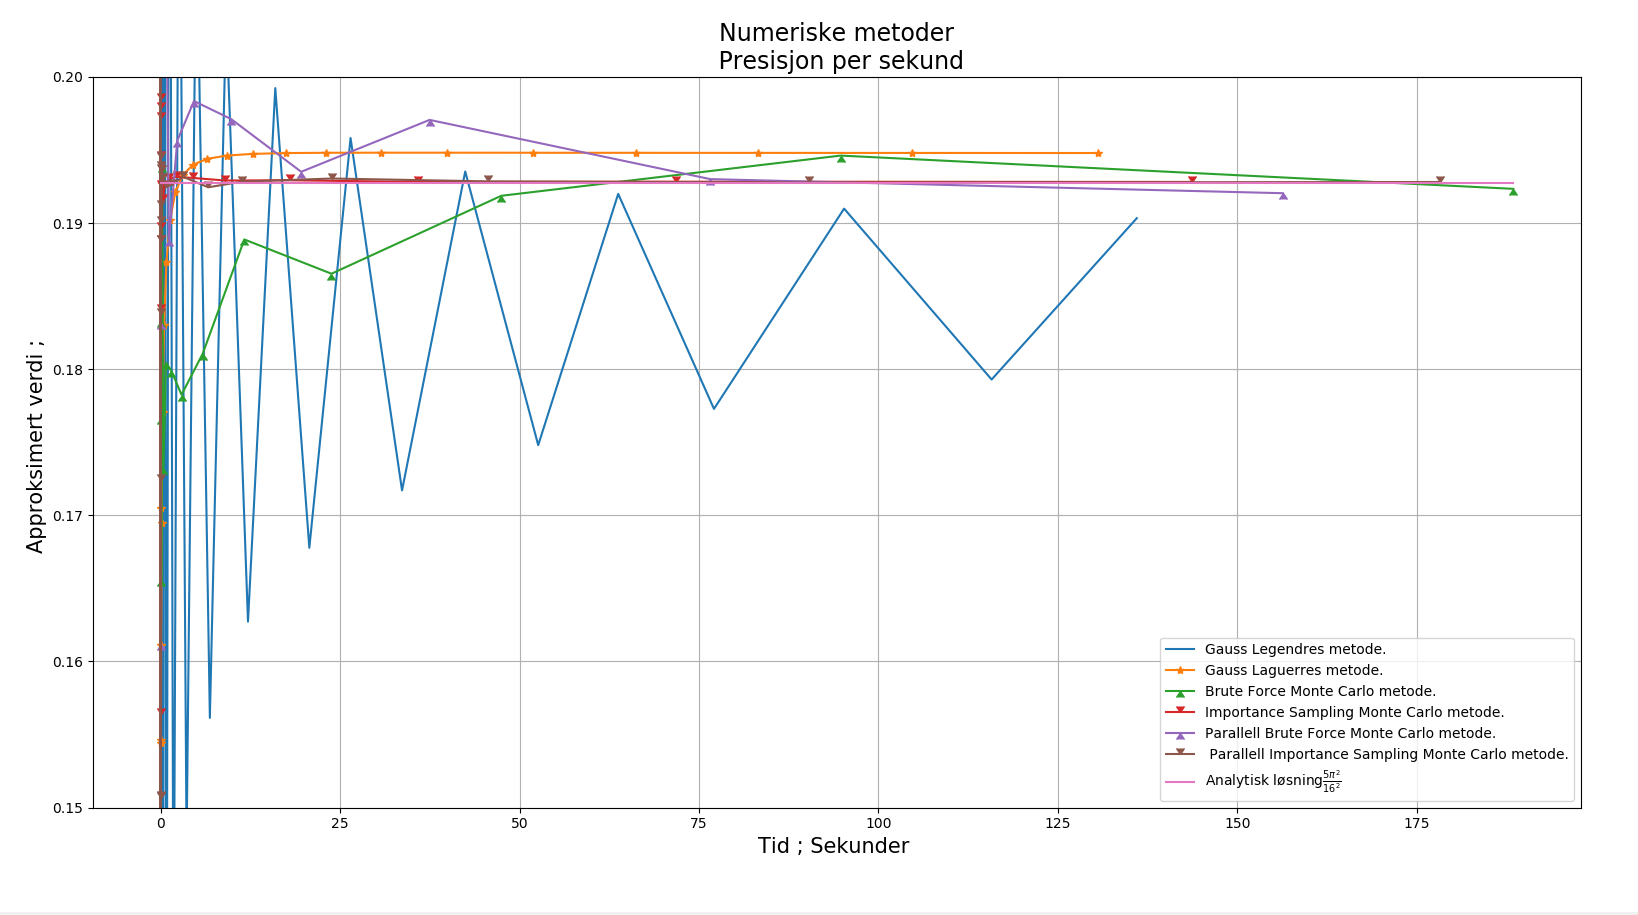

( Figur 1. )

Vi starter med å se på hva de forskjellige metodene integrerer til med hensyn på hvor lang tid metoden bruker på integralet. 


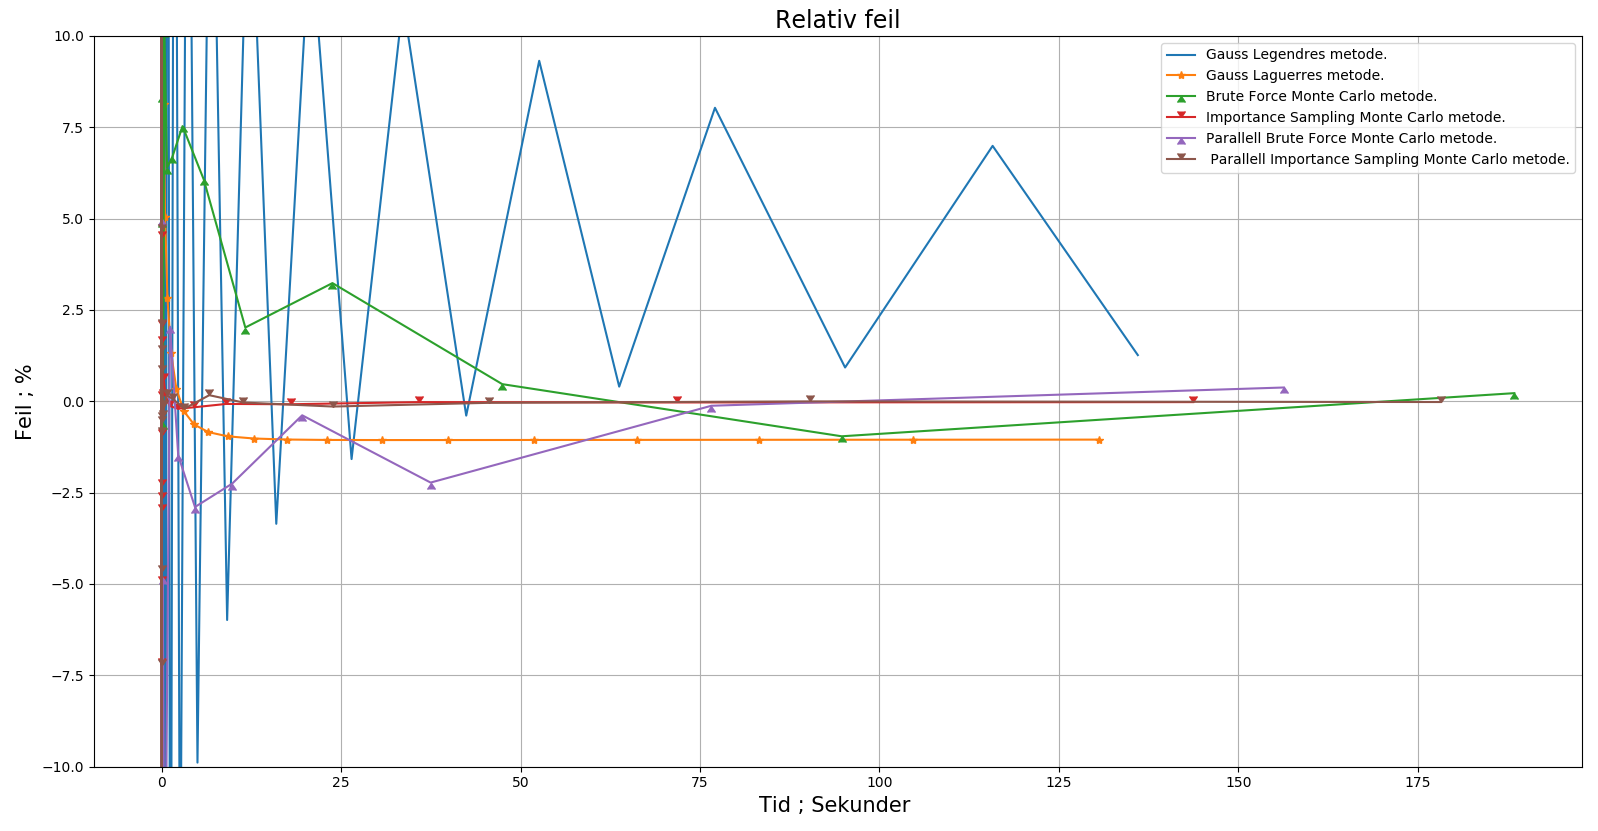

( Figur 2. )

Videre ser vi på utviklingen av den relative feilen av integralene til metodene, igjen med hensyn på tid. 

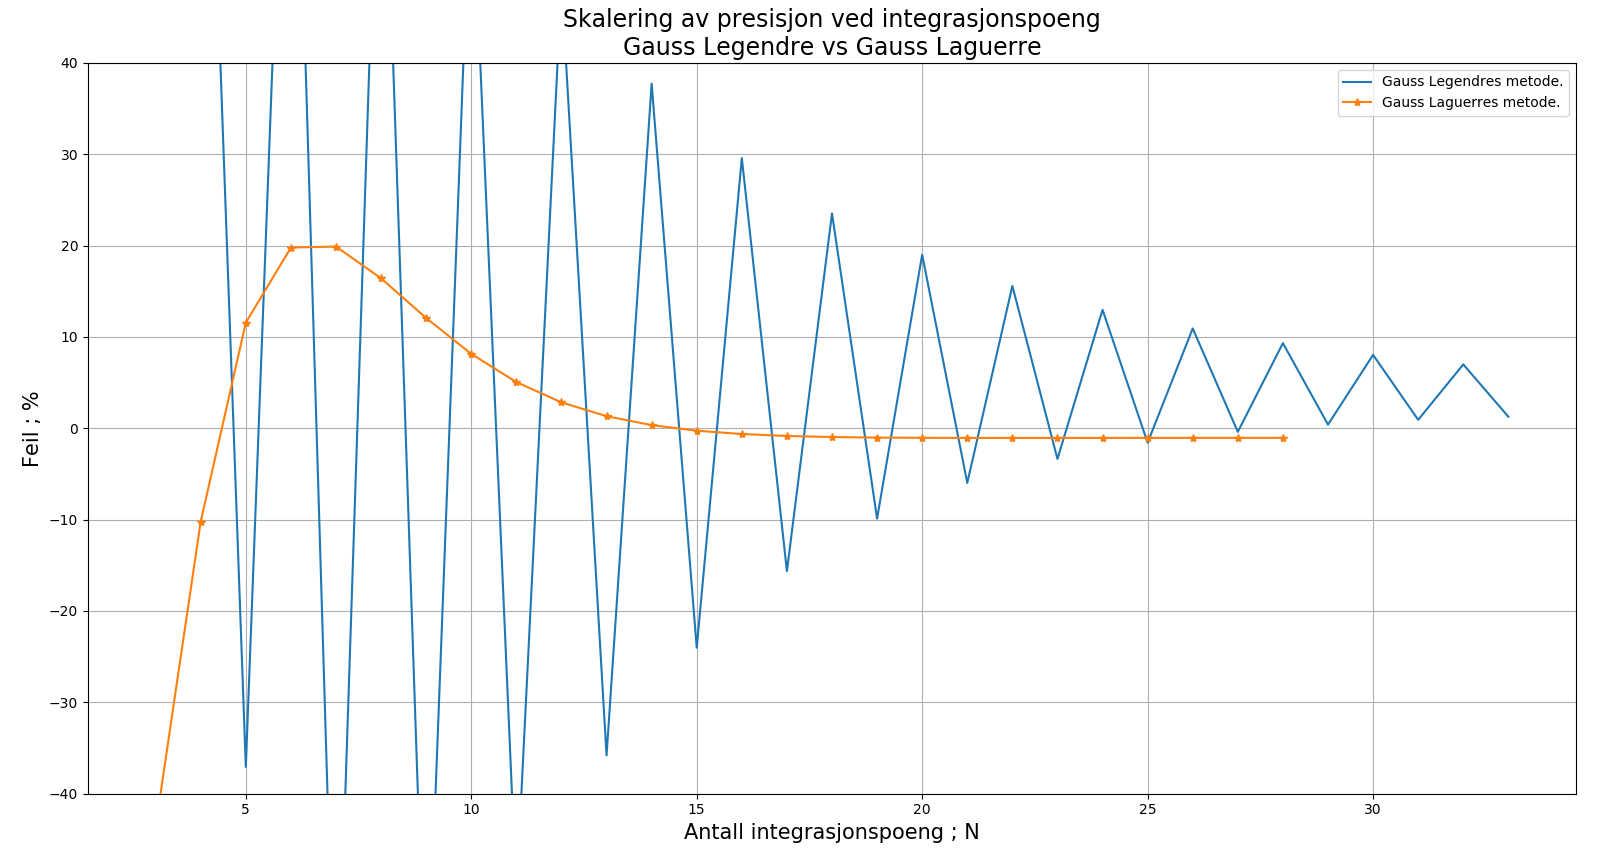

( Figur 3. )

Dette er en direkte sammenligning av Gauss Legendre og Gauss Laguerre per integrasjonspoeng, hvor kun siste integrasjonspoeng tok mer enn 2 minutter å beregne. 

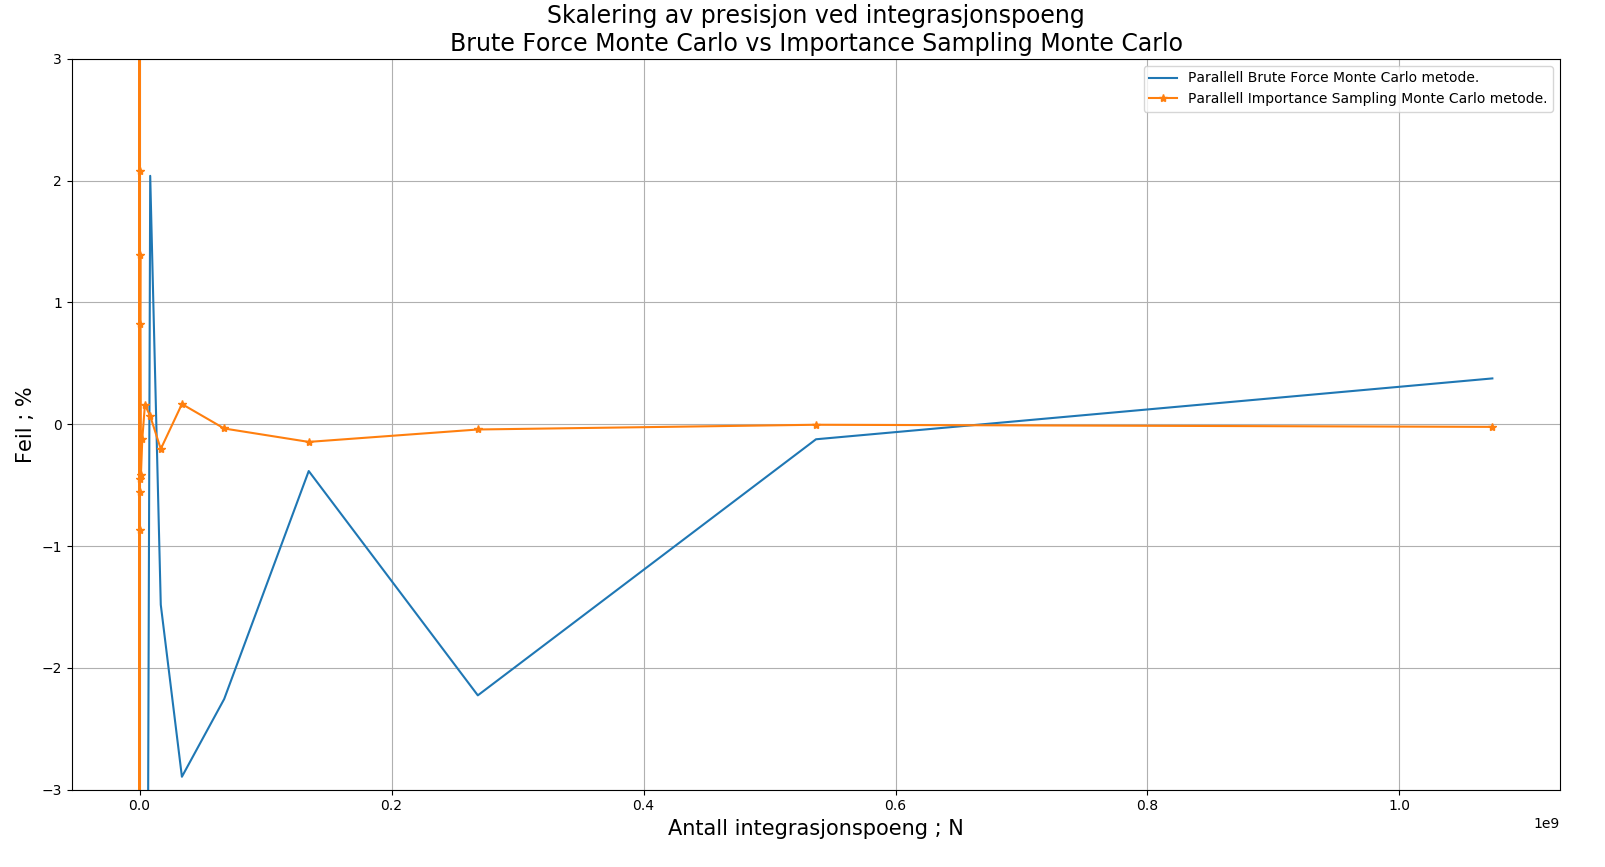


( Figur 4. )

Dette er en direkte sammenligning av Brute Force Monte Carlo og Importance Sampling Monte Carlo per integrasjonspoeng, hvor kun siste integrasjonspoeng tok mer enn 2 minutter å beregne. Vi har brukt den parallelle utgaven for å kunne se på flere integrasjonspoeng. 

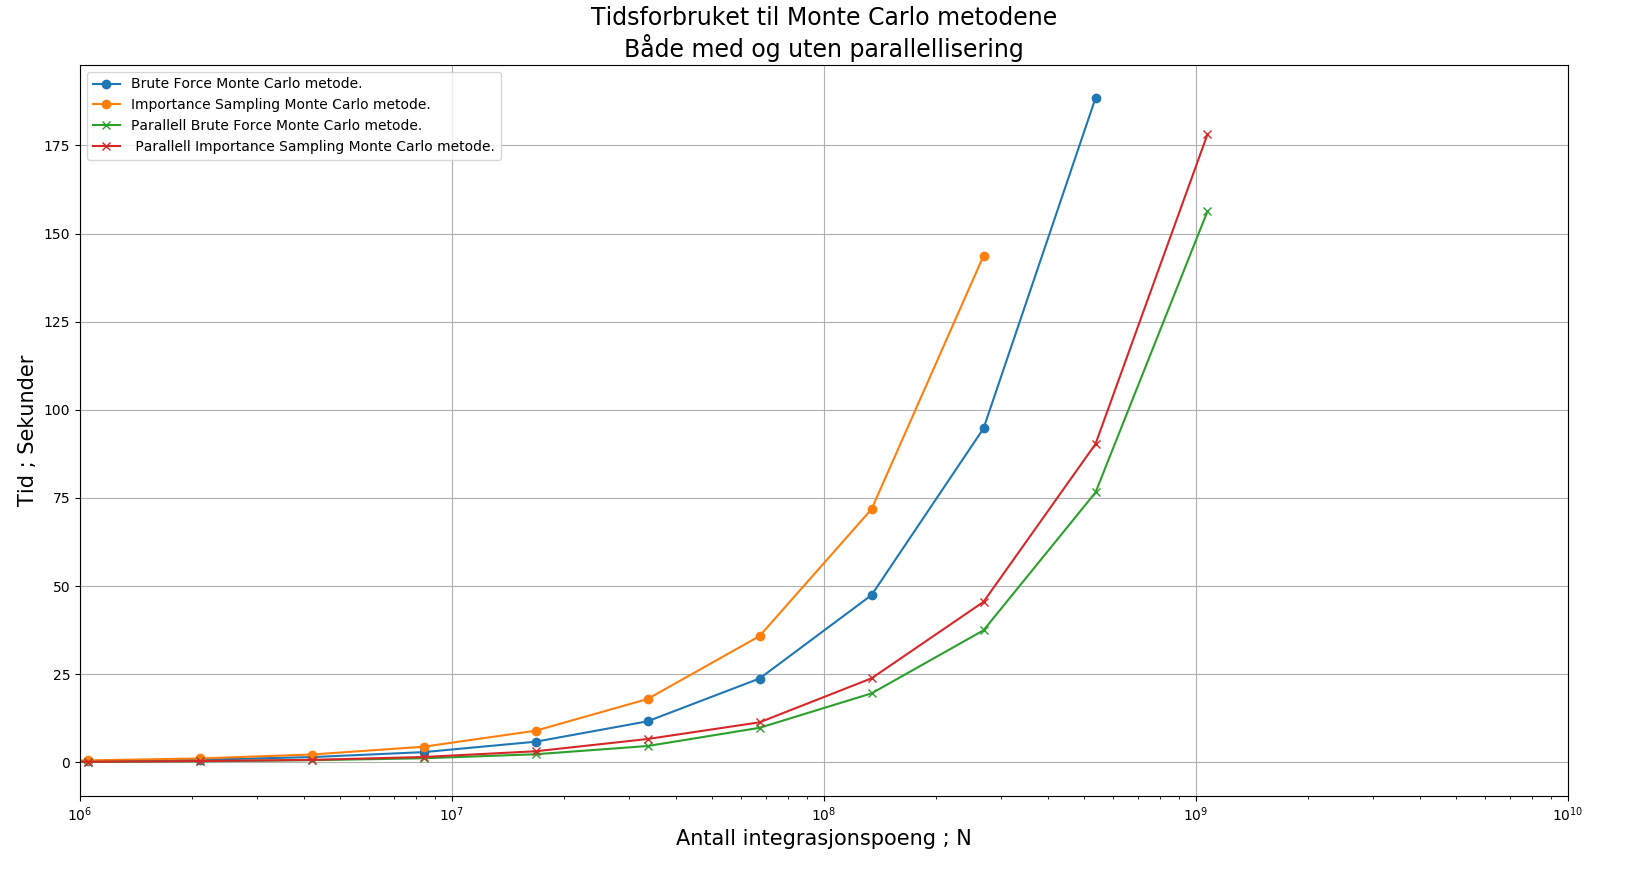

( Figur 5. )

Effektiviseringen ved bruk av OpenMPs parallellisering, dette viser oss tidsforbuket til begge Monte Carlo metodene både med og uten parallellisering.  

## Diskusjon

## Konklusjon

## Referanser


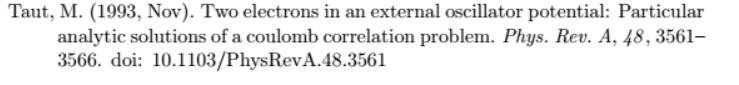
$ \hspace{5cm}$[https://journals.aps.org/pra/abstract/10.1103/PhysRevA.48.3561](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.48.3561)

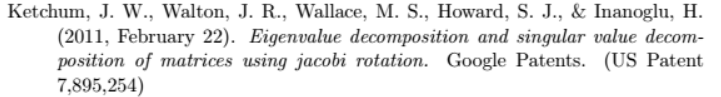

$\hspace{5cm} $[https://patentimages.storage.googleapis.com/00/1f/fa/616a49db59bf2c/US7895254.pdf](https://patentimages.storage.googleapis.com/00/1f/fa/616a49db59bf2c/US7895254.pdf)

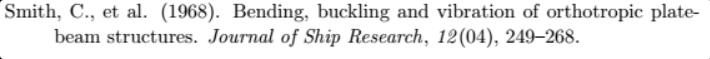

$\hspace{5cm} $[https://www.onepetro.org/journal-paper/SNAME-JSR-1968-12-4-249](https://www.onepetro.org/journal-paper/SNAME-JSR-1968-12-4-249)

# Ting som kanskje skal være med

### - Fysisk problem

I dette projektet tar vi for oss et helium atom, der elektronene er i laveste energitilstand. Vi ønsker å avgjøre hvordan korrelasjonen av energien påvirker elektronene. Dette kan vi estimere ved hjelp av Schrødingers likninger og interaksjonen mellom dem. I dette prosjektet er vi ikke like opptatt av den fysikken, men vi er mer opptatt av hvordan integrasjonsmetodene våre oppfører seg, hvilken som gir de beste resultatene og hvor effektive metodene våre er. Så prosjektet vårt koker ned til å løse en 6-dimensjonal funksjon med forskjellige metoder. 

### - Brute Force Gauss-Legendre

Vi begynner med å direkte regne ut integrasjonen av funksjonen numerisk ved hjelp av Gauss-Legendres metode, uten å gjøre noen forhåndsregninger. Gauss-Legendres metode er en lite effektiv metode som bruker svært lang tid til å få gode resultater, spesielt når vi skal bruke denne til å integrere over 6 dimsensjoner. På grunn av at metoden regner integralet ut direkte uten å gjøre forhåndsregninger, blir den kalt en brute force metode. Metoden er relavtivt simpel og rett frem, men den krever mange utregninger og vi forventer at den bruker mye tid for å få resultater, og selv da forventer vi ikke å få et tilfredsstillende svar.   

### - Laguerres metode

Gauss-Laguerres metode er en mer effektiv metode enn Brute Force Gauss-Legendre. Vi skifter fra kartesiske koordinater til polar-koordinater. I tillegg kan vi bruke Laguerre polynomer for å regne ut radiusen, som gir et bedre resultater. Dette er fordi Laguerre polynomer er definert i 0 til uendelig, så det blir lettere å approksimere uendelig med Laguerre. Vi så la vinkelene finne ut vinklene, dette kan vi gjøre på forskjellige måter, men vi velger å bruke Lagendre polynomer. Alt dette vil resultere i en raskere og mer effektiv kode. Eventuelt kan vi bruke større oppløsning for å få mer presise svar. 

### - Brute Force Monte Carlo

Vi bruker Monte Carlo metoden. Funksjonen som vi har er en 6-dimensjonal funksjon, dette er på grensen til hva vanlige Gauss kan klare. Men Monte Carlo metoden fungerer bra for funksjoner av høyere dimensjon. Vi setter opp en Brute Force MC metode der vi igjen beregner funksjonen direkte, i kartesiske koordinater. Vi bruker en uniform distribusjon, men vi merker at denne krever at N er veldig stor og selv da får vi ikke tilfredsstillende resultater.

### - Improved Monte Carlo

Vi effektiviserer Monte Carlo metoden vår. Vi gjør funksjonen som vi integrerer om til polarkoordinater. Vi bruker så eksponensial distrubisjon for å regne ut integralet av radiusen og uniform distribusjon for theta og phi. Siden vi bruker uniform distribusjon vil en del av utrykket absorberes som gjør at vi kan forhåndsregne en del av funksjonen. Med alt dette forventer vi en mye mer effektiv metode enn Brute Force Monte Carlo.

### - Effektivisering

Til slutt parallelliserer vi koden vår med OpenMP. Vi parallelliserer Brute Force MC og Improved MC for å se hvor mye fortere koden går.

### - Unit tests
Til slutt har vi også lagt til unit tests for å sjekke at alt i programmet fungerer som det skal. Vi har laget en unit test for å se at hver av metodene våre gir riktige resultater for noen simple integraler som vi har den analytiske løsningen til.



I tillegg til dette kan den være ustabil, slik at vi må teste med forskjelle N-verdier for å komme nærmere svaret, en større N gir nødvendigvis ikke et bedre resultat.